# 1. Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

# 2. Adjust Data

In [17]:
# These stats are either duplicates or not useful for our analysis
STATS_TO_DROP = ['gk_clean_sheets_pct', 'gk_goals_against', 'gk_save_pct',
    'players_used', 'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists',
    'goals_assists', 'goals_pens', 'pens_made', 'pens_att','xg', 'npxg','xg_assist', 'npxg_xg_assist', 'gk_games', 
    'gk_games_starts', 'gk_minutes','gk_saves', 'gk_wins', 'games',
    'gk_ties', 'gk_losses','gk_clean_sheets', 'gk_pens_att', 'gk_pens_allowed', 
    'gk_pens_saved', 'gk_pens_missed', 'shots', 'shots_on_target',
    'avg_age', 'goals_per90', 'assists_per90', 'goals_assists_per90',
    'goals_pens_per90', 'goals_assists_pens_per90', 'xg_per90', 'xg_assist_per90', 'xg_xg_assist_per90',
    'npxg_per90', 'npxg_xg_assist_per90', 'gk_goals_against_per90', 'gk_shots_on_target_against', 
    'gk_clean_sheets_pct', 'gk_pens_save_pct', 'gk_own_goals_against', 'gk_psxg', 
    'gk_psnpxg_per_shot_on_target_against', 'gk_psxg_net', 'gk_psxg_net_per90', 'gk_passes_completed_launched',
    'gk_passes_launched', 'gk_passes', 'gk_passes_throws', 'gk_goal_kicks', 'gk_crosses_stopped', 
    'gk_def_actions_outside_pen_area', 'shots_per90', 'shots_on_target_per90', 'gk_free_kick_goals_against',
    'goals_per_shot', 'goals_per_shot_on_target', 'average_shot_distance', 'shots_free_kicks',
    'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_short', 'passes_medium', 'passes_long', 'pass_xa',
    'xg_assist_net', 'assisted_shots', 'passes_live', 'passes_dead', 'passes_free_kicks', 'crosses', 'throw_ins',
    'corner_kicks', 'corner_kicks_straight', 'sca_per90', 'gca_per90', 
    'tackles_interceptions', 'challenge_tackles', 'challenges_lost', 'touches_live_ball', 
    'take_ons_tackled', 'cards_yellow_red', 'pens_won',	'pens_conceded', 'own_goals', 'aerials_lost'


]

# These stats are too representative of the amount of games played, leading to skewed results.
# Thus we convert them to per 90 stats.
STATS_TO_PER90 = [
    'progressive_carries', 'progressive_passes', 'gk_free_kick_goals_against', 
    'passes_completed', 'cards_red', 'cards_yellow',
    'passes_total_distance', 'passes_progressive_distance', 'passes', 'passes_completed_short',
    'passes_completed_medium', 'passes_completed_long',
    'pass_xa', 'passes_into_final_third', 'gk_crosses',
    'passes_into_penalty_area', 'crosses_into_penalty_area', 
    'through_balls', 'passes_switches',
    'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight',
    'sca_passes_live', 'sca_passes_dead',
    'sca_take_ons', 'sca_shots', 'sca_fouled', 'sca_defense', 'gca_passes_live',
    'gca_passes_dead', 'gca_take_ons', 'gca_shots', 'gca_fouled', 'gca_defense',
    'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd',
    'challenges', 'blocks', 'blocked_shots',
    'blocked_passes', 'interceptions', 'clearances', 'errors',
    'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
    'touches_att_pen_area', 'take_ons', 'take_ons_won',
    'carries', 'carries_distance', 'carries_progressive_distance',
    'carries_into_final_third', 'carries_into_penalty_area', 'miscontrols', 'dispossessed',
    'passes_received', 'progressive_passes_received', 'fouls', 'fouled',
    'offsides','ball_recoveries', 'aerials_won'

]

In [18]:
df = pd.read_csv("../data/top5Leagues.csv")

In [19]:
df['avg_carries_distance'] = df['carries_distance']/df['carries']
df['avg_progressive_carries_distance'] = df['carries_progressive_distance']/df['carries']
df['corner_kicks_conceded_pct'] = df['gk_corner_kick_goals_against']/df['gk_goals_against']
df['corner_kicks_in_pct']=df['corner_kicks_in']/(df['corner_kicks_in']+df['corner_kicks_out'])
df['passes_offsides_pct'] = df['passes_offsides']/df['passes_completed']
df['passes_blocked_pct'] = df['passes_blocked']/df['passes_completed']
df['sca_passes_live_pct']=df['sca_passes_live']/df['sca']
df['sca_passes_dead_pct']=df['sca_passes_dead']/df['sca']
df['sca_take_ons_pct']=df['sca_take_ons']/df['sca']
df['sca_fouled_pct']=df['sca_fouled']/df['sca']
df['sca_take_ons_pct']=df['sca_take_ons']/df['sca']
df['sca_shots_pct']=df['sca_shots']/df['sca']
df['sca_defense_pct']=df['sca_defense']/df['sca']
df['gca_passes_live_pct']=df['gca_passes_live']/df['gca']
df['gca_passes_dead_pct']=df['gca_passes_dead']/df['gca']
df['gca_take_ons_pct']=df['gca_take_ons']/df['gca']
df['gca_fouled_pct']=df['gca_fouled']/df['gca']
df['gca_take_ons_pct']=df['gca_take_ons']/df['gca']
df['gca_shots_pct']=df['gca_shots']/df['gca']
df['gca_defense_pct']=df['gca_defense']/df['sca']
df['tackles_def_3rd_per90_pct']=df['tackles_def_3rd']/df['tackles']
df['tackles_mid_3rd_per90_pct']=df['tackles_mid_3rd']/df['tackles']
df['tackles_att_3rd_per90_pct']=df['tackles_att_3rd']/df['tackles']
df['blocked_passes_per90_pct'] = df['blocked_passes']/df['blocks']
df['passes_total_distance_per_pass'] = df['passes_total_distance']/df['passes_completed']
df['passes_progressive_distance_per_pass'] = df['passes_progressive_distance']/df['passes_completed']
df['points_per_match'] = (3*df['gk_wins']+df['gk_ties'])/df['gk_games']

In [20]:
df[STATS_TO_PER90] = df[STATS_TO_PER90].div(df['minutes_90s'], axis=0)
df.drop(columns=STATS_TO_DROP, inplace=True)

In [21]:
df.drop(columns=['progressive_passes', 'gk_corner_kick_goals_against', 'passes_progressive_distance',
                 'passes_total_distance', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'corner_kicks_in',
                 'corner_kicks_out', 'passes_offsides', 'passes_blocked', 'sca_passes_live', 'sca', 'sca_passes_dead',
                 'sca_take_ons', 'sca_shots', 'sca_defense', 'gca_passes_live', 'gca', 'gca_passes_dead',
                 'gca_take_ons', 'gca_shots', 'gca_defense', 'blocked_passes', 'gca_fouled', 'sca_fouled'], inplace=True)

In [22]:
df = df.rename(columns={col: col + '_per90' for col in STATS_TO_PER90})
df.to_csv('../data/top5LeaguesADJUSTED.csv', index=False)

# 3. Analysis

#### Reduce multicollinearity

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numeric independent variables
X = df.select_dtypes(include=[np.number])  # Exclude categorical variables if needed

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])]

pd.set_option('display.max_rows', None)


# Display VIF values
print(vif_data)



                                  Feature         VIF
0                              possession      474.82
1                      cards_yellow_per90       61.74
2                         cards_red_per90        4.38
3               progressive_carries_per90      498.53
4                  gk_passes_pct_launched      115.49
5                  gk_pct_passes_launched       85.12
6                    gk_passes_length_avg       81.84
7              gk_pct_goal_kicks_launched      359.68
8                 gk_goal_kick_length_avg      693.34
9                        gk_crosses_per90      258.97
10                 gk_crosses_stopped_pct       10.39
11  gk_def_actions_outside_pen_area_per90       10.11
12            gk_avg_distance_def_actions       16.45
13                    shots_on_target_pct      170.61
14                 passes_completed_per90   559105.89
15                           passes_per90    81664.60
16                             passes_pct    55091.96
17           passes_complete

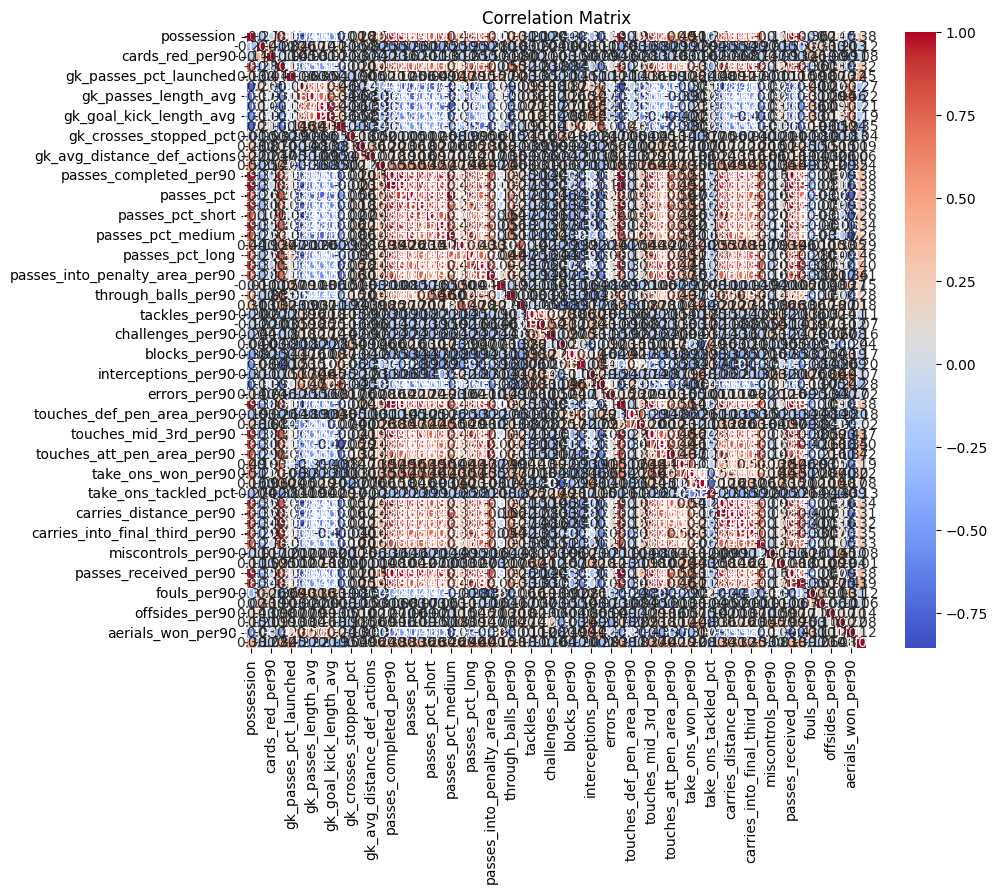

In [16]:
corr_matrix = df.iloc[:-98, 1:-2].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create df_filtered, reinclude "season" but exclude it from regression and PCA
df_filtered = df.drop(columns=["league"], errors="ignore").iloc[:-98]  # Keep "season", remove "league" & last 98 rows

# Step 2: Prepare Data for Regression (exclude "team", "season", and "points_per_match")
X = df_filtered.drop(columns=["team", "season", "points_per_match"], errors="ignore")  
y = df_filtered["points_per_match"]  # Target variable

# Step 3: Fit Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Step 4: Extract Regression Coefficients & Apply Log Transformation
coefficients = np.abs(reg_model.coef_)  # Get absolute values of coefficients
log_weights = np.log(coefficients + 1e-5)  # Apply log transform (add small value to avoid log(0))

# Step 5: Select only numerical columns for PCA (matching regression features)
teams_data = df_filtered.drop(columns=["team", "season", "points_per_match"], errors="ignore")  # Exclude categorical vars
teams_data = teams_data.select_dtypes(include=[np.number])  # Keep only numerical columns
teams_data = teams_data.loc[:, X.columns]  # Ensure it has the same columns as used in regression
teams_data = teams_data.set_index(df_filtered["team"])  # Keep "team" as index

# Step 6: Standardize Data Before PCA
scaler = StandardScaler()
teams_scaled = scaler.fit_transform(teams_data)

# Step 7: Apply Log-Transformed Weights to Features
weighted_teams_data = teams_scaled * log_weights[:teams_scaled.shape[1]]

# Step 8: Perform PCA with a Fixed Seed for Reproducibility
np.random.seed(42)  # Set random seed
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
teams_pca = pca.fit_transform(weighted_teams_data)

# Step 9: Create a DataFrame for PCA Results, keeping "team" and "season"
pca_df = pd.DataFrame(teams_pca, index=teams_data.index, columns=[f"PC{i+1}" for i in range(teams_pca.shape[1])])
pca_df["season"] = df_filtered.set_index("team")["season"]  # Re-add "season" for labeling


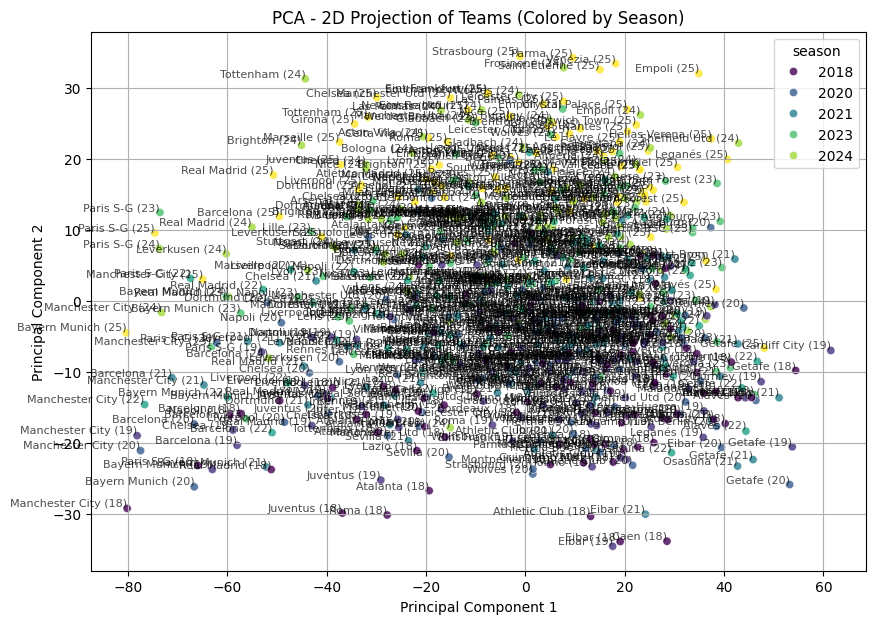

In [47]:
# Step 10: PCA Scatter Plot with Team Labels and Season Colors
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["season"], palette="viridis", alpha=0.8)

# Add Team Name Labels with Last 2 Digits of "Season"
for team, season, (x, y) in zip(pca_df.index, pca_df["season"], zip(pca_df["PC1"], pca_df["PC2"])):
    season_label = str(season)[-2:]  # Extract last 2 digits of season
    plt.text(x, y, f"{team} ({season_label})", fontsize=8, ha='right', va='bottom', alpha=0.7)

# Formatting the Plot
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Projection of Teams (Colored by Season)")
plt.grid(True)
plt.show()


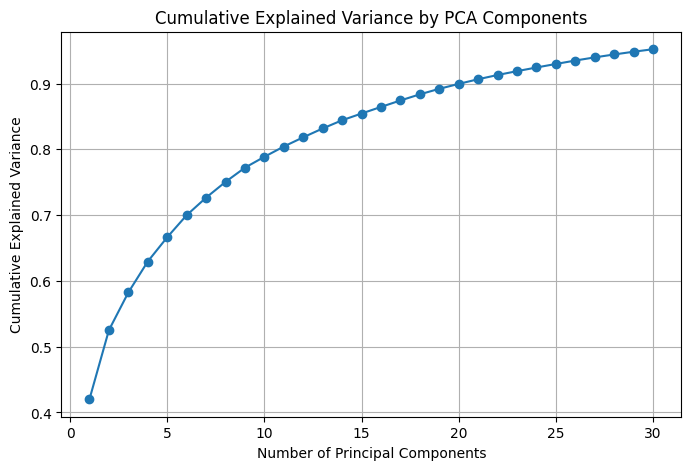

Cumulative Variance Explained by 30 components: 0.95


In [49]:
import matplotlib.pyplot as plt

# Check cumulative variance explained by PCA components
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA Components")
plt.grid(True)
plt.show()

# Print final variance retained
print(f"Cumulative Variance Explained by {pca.n_components_} components: {explained_variance_cumulative[-1]:.2f}")


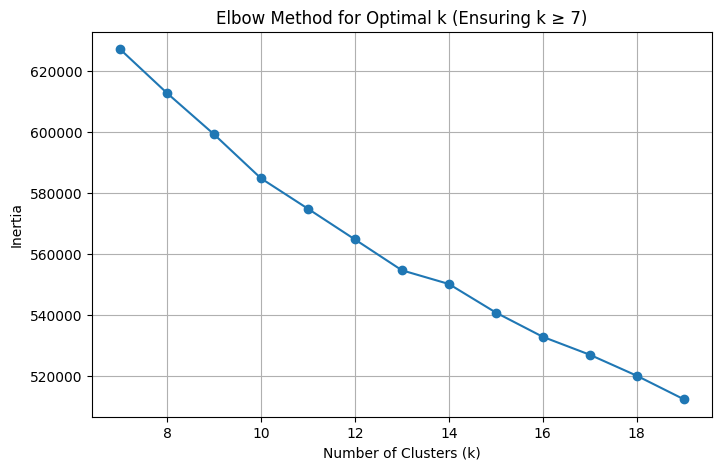

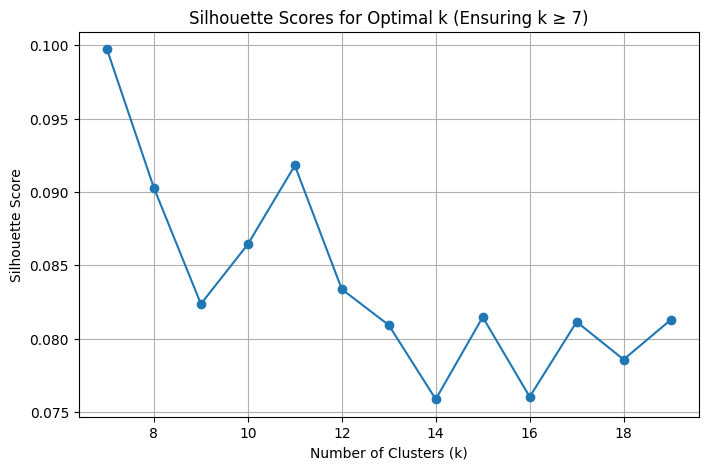

Optimal Number of Clusters (Ensuring k ≥ 7): 7


,Cluster,season
team,,
Arsenal,0,2025
Aston Villa,6,2025
Bournemouth,4,2025
Brentford,6,2025
Brighton,0,2025
Chelsea,0,2025
Crystal Palace,4,2025
Everton,4,2025
Fulham,0,2025


Cluster results saved to 'clustered_teams.csv'


In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find the Optimal Number of Clusters Using the Elbow Method & Silhouette Score
inertia = []
silhouette_scores = []
cluster_range = range(7, 20)  # Ensure at least 7 clusters, testing up to 15

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_df.iloc[:, :-1])  # Exclude "season" column for clustering
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df.iloc[:, :-1], kmeans.labels_))

# Step 2: Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k (Ensuring k ≥ 7)")
plt.grid(True)
plt.show()

# Step 3: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Optimal k (Ensuring k ≥ 7)")
plt.grid(True)
plt.show()

# Step 4: Choose Optimal k (Ensuring Minimum of 7 Clusters)
optimal_k = cluster_range[np.argmax(silhouette_scores)]  # Select k with highest silhouette score
print(f"Optimal Number of Clusters (Ensuring k ≥ 7): {optimal_k}")

# Step 5: Apply K-Means Clustering with Optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_df["Cluster"] = kmeans.fit_predict(pca_df.iloc[:, :-2])  # Exclude "season" from clustering

# Step 6: Create a Table with Team, Season, and Cluster Assignment
cluster_table = pca_df[["Cluster", "season"]]

# Display the Clustered DataFrame
import pandas as pd
from IPython.display import display

display(cluster_table)

# Save results to CSV (optional)
cluster_table.to_csv("clustered_teams.csv")
print("Cluster results saved to 'clustered_teams.csv'")


In [50]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10).fit(pca_df.iloc[:, :-2])  # Adjust eps based on density
pca_df["DBSCAN_Cluster"] = dbscan.labels_  # Assign clusters

# Count unique clusters (excluding noise points)
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"DBSCAN found {num_clusters} clusters.")


DBSCAN found 0 clusters.


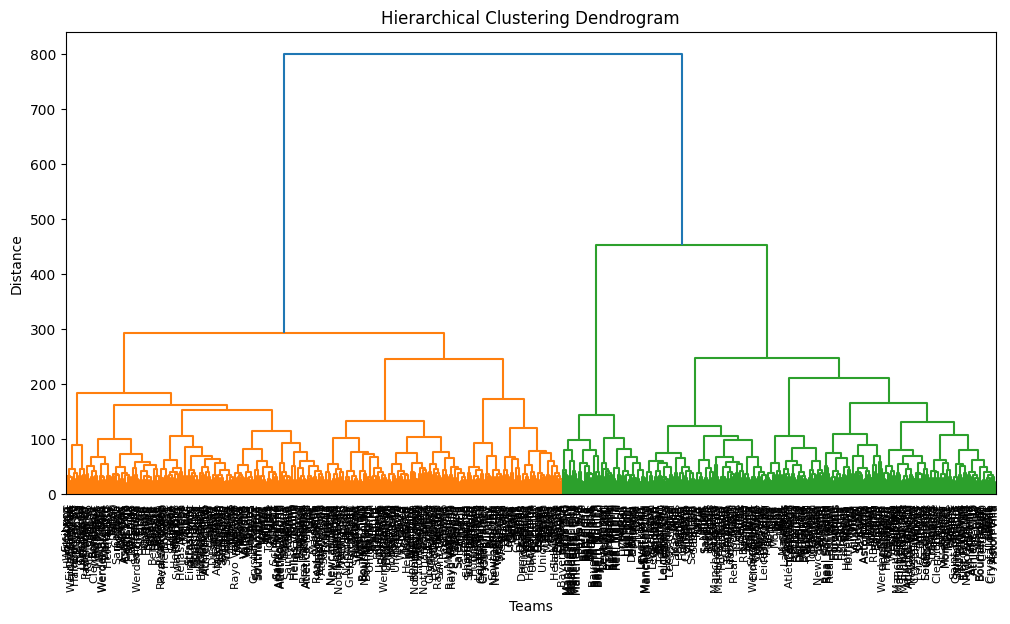

,season,Agglo_Cluster
team,,
Arsenal,2025,0
Aston Villa,2025,0
Bournemouth,2025,0
Brentford,2025,0
Brighton,2025,0
Chelsea,2025,0
Crystal Palace,2025,1
Everton,2025,1
Fulham,2025,0


In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Compute the linkage matrix for the dendrogram
linked = linkage(pca_df.iloc[:, :-2], method="ward")

# Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=pca_df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Teams")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k)
pca_df["Agglo_Cluster"] = agglo.fit_predict(pca_df.iloc[:, :-2])

# Display Cluster Assignments
display(pca_df[["season", "Agglo_Cluster"]])


In [53]:
# Apply K-Means Clustering with k=11
optimal_k = 11  # From the silhouette score plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_df["Cluster"] = kmeans.fit_predict(pca_df.iloc[:, :-2])  # Exclude "season"

# Create a Table with Team, Season, and Cluster Assignment
cluster_table = pca_df[["Cluster", "season"]]

# Display the Clustered DataFrame
from IPython.display import display
display(cluster_table)

# Save the new clusters to CSV
cluster_table.to_csv("clustered_teams_k11.csv")
print("Cluster results saved to 'clustered_teams_k11.csv'")


,Cluster,season
team,,
Arsenal,7,2025
Aston Villa,7,2025
Bournemouth,2,2025
Brentford,7,2025
Brighton,7,2025
Chelsea,4,2025
Crystal Palace,5,2025
Everton,5,2025
Fulham,7,2025


Cluster results saved to 'clustered_teams_k11.csv'
